3) Com base nos dados públicos da série histórica climática no arquivo “Dados_climaticos_historicos.xlsx”, aba da 
cidade  Macaé,  monte  um  arquivo  ASCII  (txt)  organizado  em  colunas  de  dados:  meses,  temperaturas  mínima, 
máxima e média. Após, use o comando open para realizar a leitura de dados, a fim de instanciar 4 listas: uma com 
os 12 meses, e as outras para as temperaturas mínima, máxima e média. Em seguida, demonstre: como montar um 
dicionário  de  dados  formado  a  partir  destas  4  listas,  exibindo  seu  conteúdo;  e,  depois  como  fazer  para  exibir  a 
temperatura média do mês de julho. Por fim, realize um plot (gráfico cartesiano) mostrando todas as temperaturas 
nos meses.  
> Objetiva técnicas de leitura de arquivo ASCII, listas (list), dicionários (data dictionary) e geração de gráfico cartesiano 
simples (plot).

Importando as Bibliotecas Necessárias
Primeiro, vamos importar as bibliotecas que utilizaremos. openpyxl é necessária para ler o arquivo .xlsx, e matplotlib.pyplot será usada para gerar nosso gráfico no final.

In [73]:
import openpyxl
import matplotlib.pyplot as plt

Lendo os Dados da Planilha Excel e Criando o Arquivo TXT
Nesta etapa, vamos abrir o arquivo Excel, navegar até a planilha correta (Historico_Clima_Macae) e extrair os dados das linhas que contêm os meses e as temperaturas. Em seguida, vamos escrever esses dados de forma organizada em um novo arquivo de texto chamado dados_climaticos_macae.txt.

In [74]:


arquivo_excel = '../Dados_climaticos_historicos.xlsx'
nome_planilha = 'Historico_Clima_Macae'

workbook = openpyxl.load_workbook(arquivo_excel)
planilha = workbook[nome_planilha]


linha_meses = []
for celula in planilha[4][1:]:
    linha_meses.append(celula.value)

linha_media = []
for celula in planilha[5][1:]:
    linha_media.append(celula.value)

linha_minima = []
for celula in planilha[6][1:]:
    linha_minima.append(celula.value)

linha_maxima = []
for celula in planilha[7][1:]:
    linha_maxima.append(celula.value)

nome_arquivo_txt = 'Dados_climaticos_historicos.txt'

with open(nome_arquivo_txt, mode='w', encoding='utf-8') as arquivo_txt:
    arquivo_txt.write("Mes\tMinima\tMaxima\tMedia\n")

    for i in range(len(linha_meses)):
        mes = linha_meses[i]
        minima = linha_minima[i]
        maxima = linha_maxima[i]
        media = linha_media[i]

        arquivo_txt.write(f"{mes}\t{minima}\t{maxima}\t{media}\n")

print(f"Arquivo '{nome_arquivo_txt}' gerado com sucesso a partir do Excel!")

Arquivo 'Dados_climaticos_historicos.txt' gerado com sucesso a partir do Excel!


Lendo o Arquivo TXT e Carregando os Dados em Listas
Agora que temos nosso arquivo dados_climaticos_macae.txt, vamos usar o comando open para lê-lo. Iremos processar cada linha do arquivo para popular quatro listas separadas.

In [75]:
meses = []
temperaturas_minima = []
temperaturas_maxima = []
temperaturas_media = []

with open(nome_arquivo_txt, mode='r', encoding='utf-8') as arquivo:
    next(arquivo)
    
    for linha in arquivo:
        # Remove espaços em branco no início/fim e divide a linha em colunas usando o tab (\t)
        partes = linha.strip().split('\t')
        meses.append(partes[0])
        temperaturas_minima.append(float(partes[1]))
        temperaturas_maxima.append(float(partes[2]))
        temperaturas_media.append(float(partes[3]))

print("Listas criadas a partir do arquivo de texto:")
print(f"Meses: {meses}")
print(f"Temperaturas Mínimas: {temperaturas_minima}")
print(f"Temperaturas Máximas: {temperaturas_maxima}")
print(f"Temperaturas Médias: {temperaturas_media}")

Listas criadas a partir do arquivo de texto:
Meses: ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
Temperaturas Mínimas: [23.5, 23.6, 23.3, 21.9, 19.6, 18.5, 17.9, 18.3, 19.2, 20.5, 21.4, 22.7]
Temperaturas Máximas: [29.1, 29.5, 28.5, 27.1, 25.0, 24.5, 24.2, 24.7, 25.5, 26.4, 26.5, 28.0]
Temperaturas Médias: [25.8, 26.0, 25.5, 24.1, 22.0, 21.2, 20.7, 21.0, 21.8, 22.9, 23.5, 24.9]


Montando e Exibindo um Dicionário de Dados
Com as listas prontas, podemos organizá-las em uma estrutura de dados mais robusta: um dicionário. Isso facilita o acesso aos dados.

In [76]:
dados_climaticos_dict = {
    "mes": meses,
    "temperatura_minima": temperaturas_minima,
    "temperatura_maxima": temperaturas_maxima,
    "temperatura_media": temperaturas_media
}

print("Dicionário de dados climáticos:")
print(dados_climaticos_dict)

Dicionário de dados climáticos:
{'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'], 'temperatura_minima': [23.5, 23.6, 23.3, 21.9, 19.6, 18.5, 17.9, 18.3, 19.2, 20.5, 21.4, 22.7], 'temperatura_maxima': [29.1, 29.5, 28.5, 27.1, 25.0, 24.5, 24.2, 24.7, 25.5, 26.4, 26.5, 28.0], 'temperatura_media': [25.8, 26.0, 25.5, 24.1, 22.0, 21.2, 20.7, 21.0, 21.8, 22.9, 23.5, 24.9]}


Exibindo a Temperatura Média do Mês de Julho
Agora, vamos demonstrar como usar as estruturas que criamos para responder a uma pergunta específica: Qual foi a temperatura média em julho?

Para isso, primeiro encontramos o índice (a posição) do mês "Julho" na nossa lista de meses. Depois, usamos esse mesmo índice para encontrar a temperatura média correspondente na lista de temperaturas médias.

In [77]:

try:
    indice_julho = meses.index('Julho')
    
    temp_media_julho = temperaturas_media[indice_julho]
    
    print(f"A temperatura média do mês de Julho foi de {temp_media_julho}°C.")

except ValueError:
    print("O mês de 'Julho' não foi encontrado nos dados.")

A temperatura média do mês de Julho foi de 20.7°C.


Gerando o Gráfico Cartesiano das Temperaturas
Finalmente, a melhor forma de entender a variação das temperaturas ao longo do ano é através de um gráfico. Usaremos a biblioteca matplotlib para plotar as temperaturas mínima, máxima e média em um mesmo gráfico cartesiano, com os meses no eixo X e as temperaturas no eixo Y.

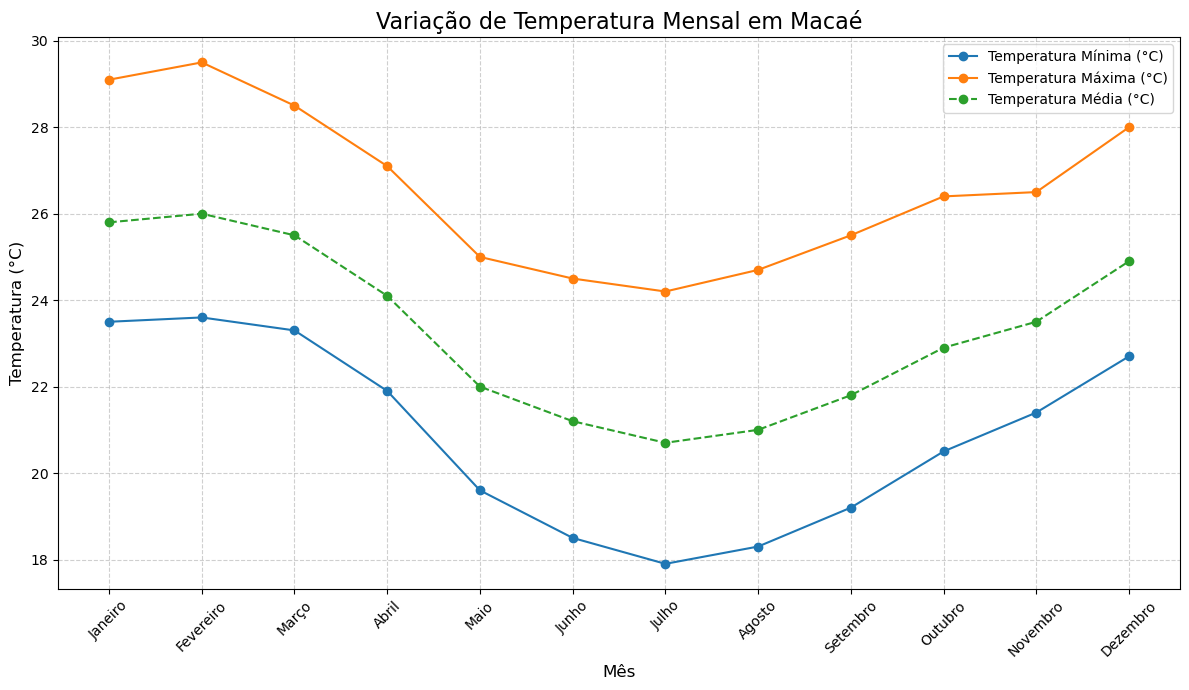

In [78]:
# Criando a figura e os eixos para o gráfico
plt.figure(figsize=(12, 7))

# Plotando cada série de temperatura
plt.plot(meses, temperaturas_minima, marker='o', linestyle='-', label='Temperatura Mínima (°C)')
plt.plot(meses, temperaturas_maxima, marker='o', linestyle='-', label='Temperatura Máxima (°C)')
plt.plot(meses, temperaturas_media, marker='o', linestyle='--', label='Temperatura Média (°C)')

# Adicionando títulos e rótulos para deixar o gráfico informativo
plt.title('Variação de Temperatura Mensal em Macaé', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)

# Rotacionando os rótulos do eixo X para melhor legibilidade
plt.xticks(rotation=45)

# Adicionando uma grade para facilitar a leitura dos valores
plt.grid(True, linestyle='--', alpha=0.6)

# Adicionando a legenda para identificar cada linha
plt.legend()

# Ajustando o layout para evitar que os rótulos se sobreponham
plt.tight_layout()

# Exibindo o gráfico
plt.show()